In [129]:
import pandas as pd
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
path = '/Users/yudiwang/Documents/GitProject/Best-Sellers-in-Book/new_all_category.csv'
data = pd.read_csv(path)
times_y = []
times_m = []
yr_2018 = []
for t in range(len(data['publish date'])):
    times_y.append(data['publish date'][t].split()[0].split('/')[-1])
    if times_y[t] == '2018':
        yr_2018.append('2018')
    else:
        yr_2018.append('Other')
    times_m.append(data['publish date'][t].split()[0].split('/')[-2])
data['publish year'] = times_y
data['publish month'] = times_m
data['2018'] = yr_2018
data.head(2)
data = data.drop(['detail_url','publish date'], axis =1)

Category
Bible                     52.878263
History                   40.634526
Law                       70.179263
Science                   39.679579
Technology-engineering    73.721368
Travel                    34.455737
Name: price, dtype: float64


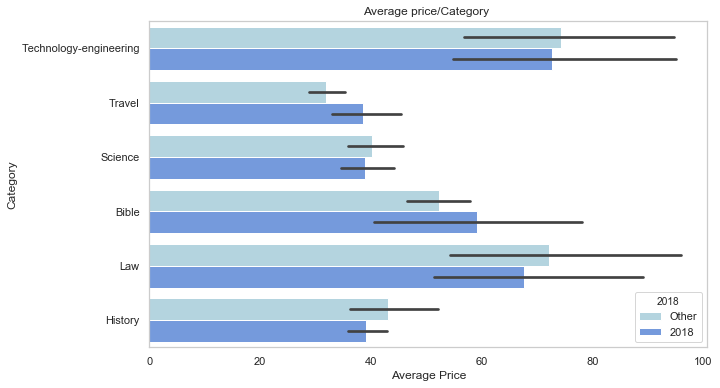

In [119]:
list_cate = ['History', 'Law','Bible', 'Science', 'Travel', 'Technology-engineering']
df = data[data['Category'].isin(list_cate)]
t1 = df.groupby('Category')
c_means = t1['price'].mean()
print(c_means)
pyplot.figure(
    figsize=(10,6)
)
sns.set(style='whitegrid')
ax = sns.barplot(y='Category',
                 x='price', 
                 hue='2018',
                 palette=['lightblue','cornflowerblue'],
                 data=df)
ax.set_title('Average price/Category ')
ax.set_xlabel('Average Price')
ax.grid(False)
# sns.despine(bottom=True, left=True)
# pyplot.xticks(rotation=90)
plt.show()

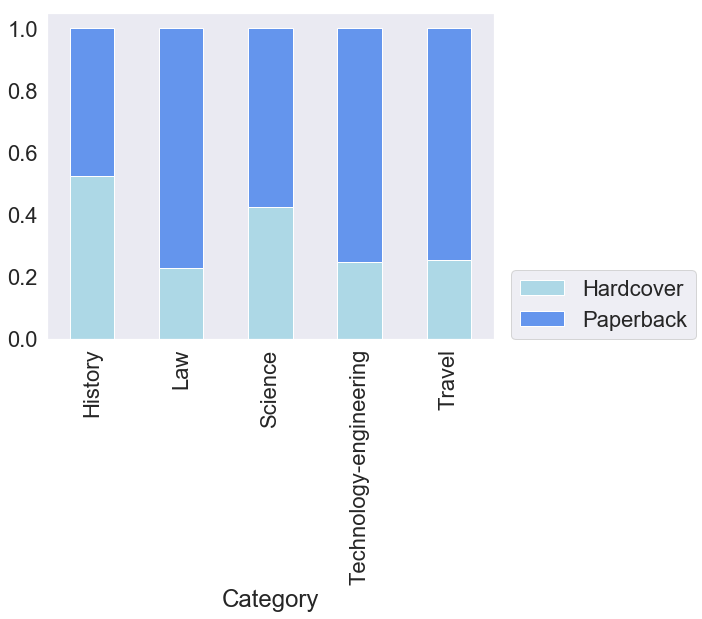

In [124]:
# color_set = ['salmon','orange','gold','palegreen','turquoise',
#              'palevioletred','plum','pink','darkkhaki','lightsalmon','lightblue',
#              'mediumpurple','purple','deepskyblue','limegreen','firebrick']
list_type = ['Paperback','Hardcover']
list_cate = ['History', 'Law', 'Science', 'Travel', 'Technology-engineering']
df = data[data['Category'] !='Bible']
df = df[df['Category'].isin(list_cate)]
df = df[df['publish type'].isin(list_type)]
df2 = df.groupby(['Category','publish type']).size().unstack('publish type').fillna(0)
ax = df2.div(df2.sum(axis=1),axis=0).plot(kind='bar',
             stacked =True,
             figsize = (8,6),
             color=['lightblue','cornflowerblue'],
            )
plt.legend(fontsize='small')
plt.legend(loc=(1.04,0))
ax.grid(False)
sns.set(font_scale=2) 

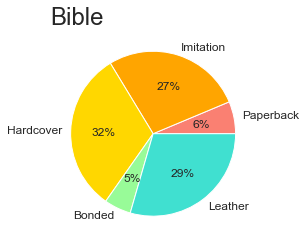

In [65]:
color_set = ['salmon','orange','gold','palegreen','turquoise',
             'palevioletred','plum','pink','darkkhaki','lightsalmon','lightblue',
             'mediumpurple','purple','deepskyblue','limegreen','firebrick']
df = data[data['Category'] =='Bible']
lg = list(df['publish type'].unique())
df2 = df.groupby(['publish type']).size()
ax = plt.pie(df2, colors =color_set, labels=lg, autopct='%1.0f%%' ,textprops={'fontsize': 12})
# plt.legend(fontsize='large')
plt.title('Bible', loc = 'left')
plt.tight_layout()

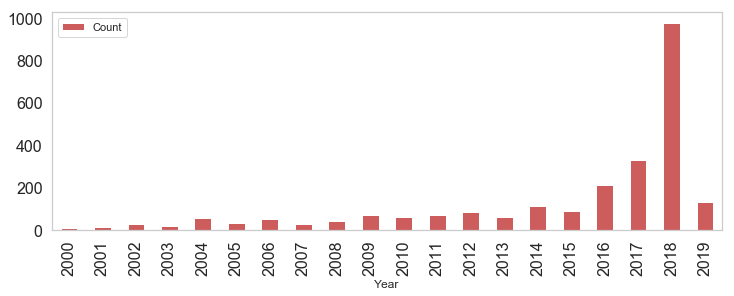

In [121]:
# Years of maximum release of Books
# Plot the result_yr
from matplotlib import pyplot
ax = result_yr.set_index('Year').sort_index().plot(
    kind='bar',
#     title='Releasing per year',
    color = 'IndianRed', 
    figsize=(12,4),
    fontsize = 16
)
# sns.despine(bottom=True, left=True)
ax.grid(False)
# ax.set_axis_bgcolor("white")
pyplot.show()

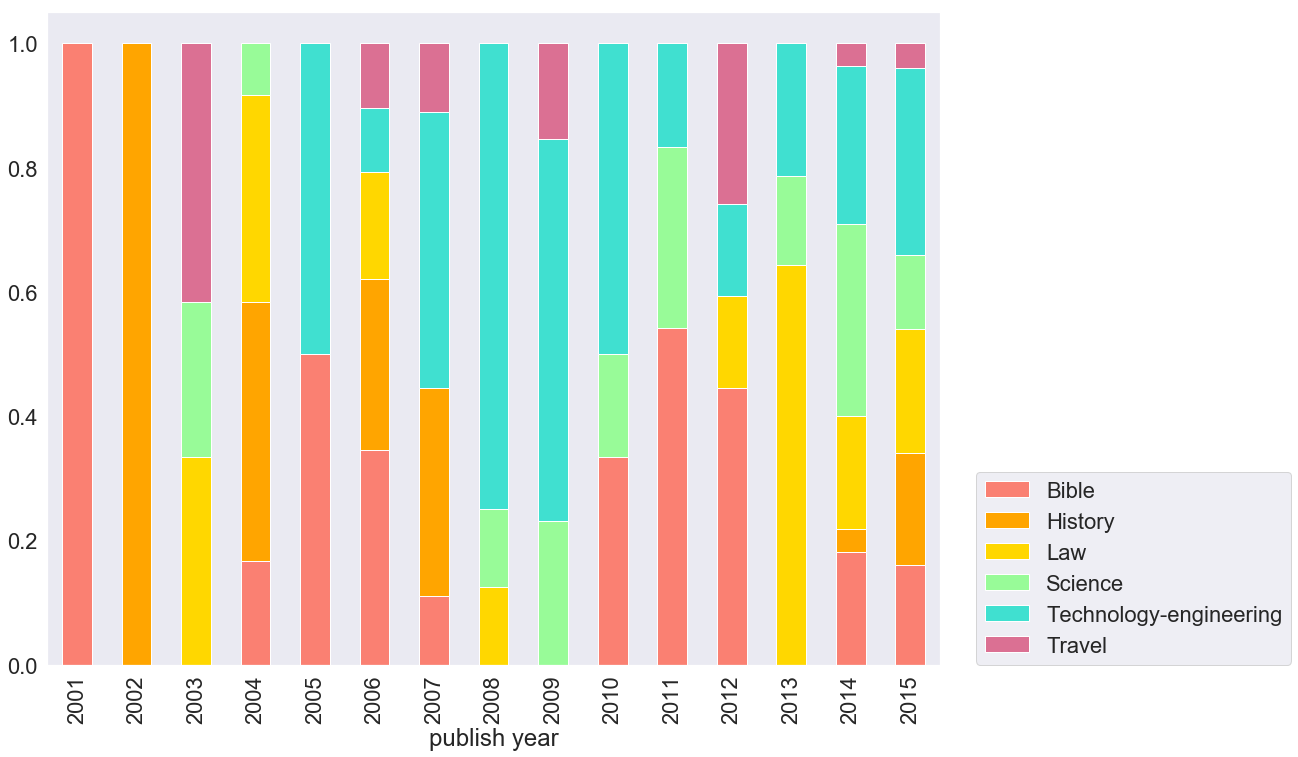

In [145]:
list_year = list(range(2000,2016))
list_yr = [str(x) for x in list_year]
data = data[data['publish year'].isin(list_yr)]

list_cate = ['History', 'Law','Bible', 'Science', 'Travel', 'Technology-engineering']
data = data[data['Category'].isin(list_cate)]

color_set = ['salmon','orange','gold','palegreen','turquoise',
             'palevioletred','plum','pink','darkkhaki','lightsalmon','lightblue',
             'mediumpurple','purple','deepskyblue','limegreen','firebrick']
df2 = data.groupby(['publish year','Category']).size().unstack('Category').fillna(0)
ax = df2.div(df2.sum(axis=1),axis=0).plot(kind='bar',
             stacked =True,
             figsize = (16,12),
             color = color_set
            )
plt.legend(fontsize='small')
plt.legend(loc=(1.04,0))
ax.grid(False)
sns.set(font_scale=2) 

In [53]:
lg = list(df['publish type'].unique())
lg

['Paperback', 'Imitation', 'Hardcover', 'Bonded', 'Leather']

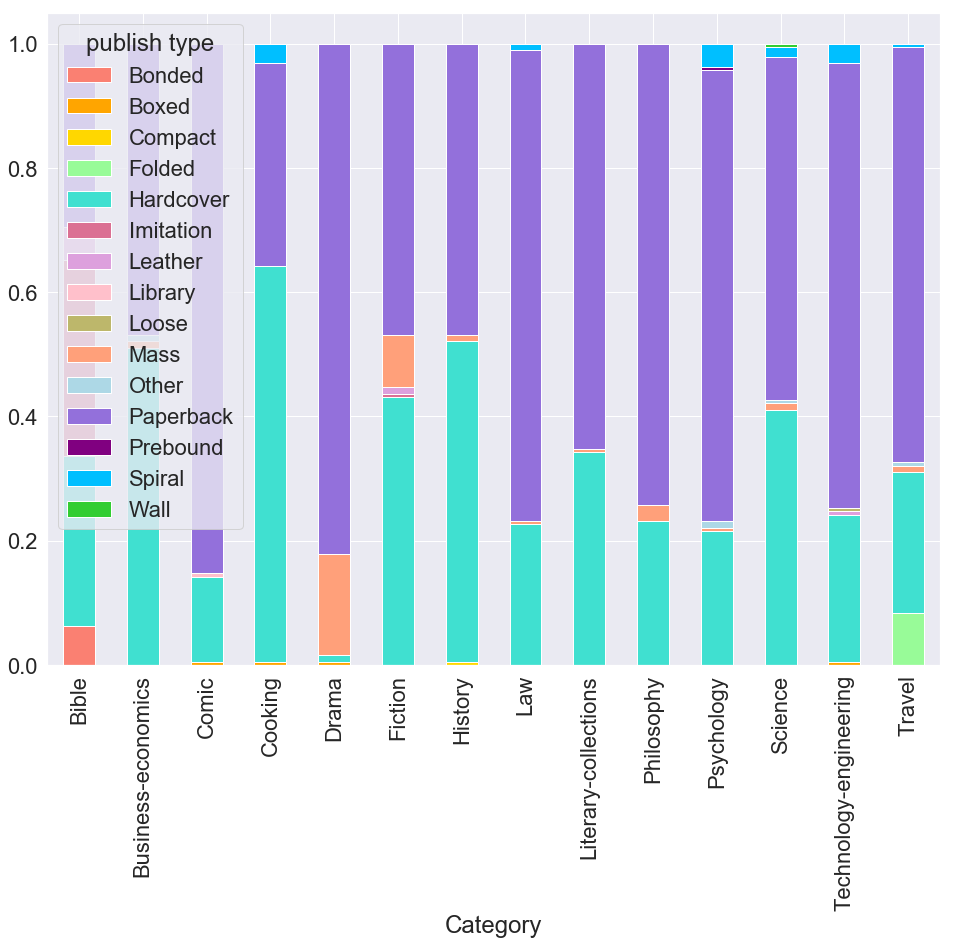

In [71]:
color_set = ['salmon','orange','gold','palegreen','turquoise',
             'palevioletred','plum','pink','darkkhaki','lightsalmon','lightblue',
             'mediumpurple','purple','deepskyblue','limegreen','firebrick']
# list_type = ['Paperback','Hardcover']
# df = data[data['Category'] !='Bible']
# df = df[df['publish type'].isin(list_type)]
df2 = data.groupby(['Category','publish type']).size().unstack('publish type').fillna(0)
df2.div(df2.sum(axis=1),axis=0).plot(kind='bar',
             stacked =True,
             figsize = (16,12),
             color = color_set
            )

In [104]:
list_year = list(range(2000,2020))
list_yr = [str(x) for x in list_year]
data = data[data['publish year'].isin(list_yr)]
import calendar
times = data['publish date'][:]
freq_yr = []
freq_mth = []
yr_dict = {}
for ele in times:
    tmp_yr = ele.split()[0].split('/')[-1]
    tmp_mth = ele.split()[0].split('/')[-2]
    freq_yr.append(tmp_yr)
    freq_mth.append(tmp_mth)

unique_yr = set(freq_yr)
item_yr = []
cnt_yr = []
for ele in unique_yr:
    item_yr.append(ele)
    cnt_yr.append(freq_yr.count(ele))
    
count_dict_yr = {}
count_dict_yr = {'Year':item_yr, 'Count':cnt_yr}
result_yr = pd.DataFrame(count_dict_yr)

unique_mth = set(freq_mth)
item_mth = []
cnt_mth = []
for ele in unique_mth:
#     tmp = int(ele)
#     ele_abbr = calendar.month_abbr[tmp]
#     item_mth.append(ele_abbr)
    item_mth.append(ele)
    cnt_mth.append(freq_mth.count(ele))
    
count_dict_mth = {}
count_dict_mth = {'Month':item_mth, 'Count':cnt_mth}
result_mth = pd.DataFrame(count_dict_mth)

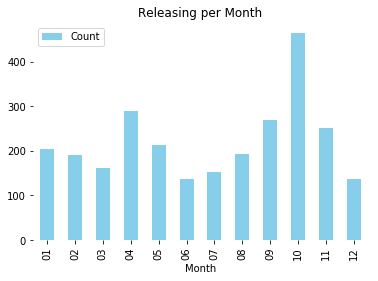

In [18]:
result_mth.set_index('Month').sort_index().plot(
    kind='bar',
    title='Releasing per Month', 
    color = []'SkyBlue'
)
sns.despine(bottom=True, left=True)
pyplot.show()